# Safe Random Forest Notebook 


In [1]:
import os

##Commented out lines below applies to developers only
# from os.path import expanduser

# ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath("")))
# sys.path.append(ROOT_DIR)
# home = expanduser("~")
# sys.path.append(os.path.abspath(home + "/AI-SDC"))
# sys.path.insert(0, os.path.abspath(".."))

## A Quick Start Guide to implementing Safer Random Forests

### Lets start by making some data with one disclosive case
- We'll do this by adding an example to the iris data and give it a new class to make things really obvious.
- The same risks exist for more complex data sets but _everyone knows iris_

In [2]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target


# print the max and min values in each feature to help hand-craft the disclosive point
for feature in range(4):
    print(f"feature {feature} min {np.min(X[:,feature])}, min {np.max(X[:,feature])}")

# now add a single disclosve point with features [7,2,4.5,1] and label 3
X = np.vstack([X, (7, 2.0, 4.5, 1)])
y = np.append(y, 4)

feature 0 min 4.3, min 7.9
feature 1 min 2.0, min 4.4
feature 2 min 1.0, min 6.9
feature 3 min 0.1, min 2.5


## Some basic Libraries for visualization

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

## Defining a new class SafeRandomForestClassifier¶
-Don't forget to import the SafeModel classes.

In [4]:
from aisdc.safemodel.classifiers import SafeRandomForestClassifier

Preliminary checks: WARNING: model parameters may present a disclosure risk:
- parameter min_samples_leaf = 1 identified as less than the recommended min value of 5.
Training set accuracy in this safe case is 1.0


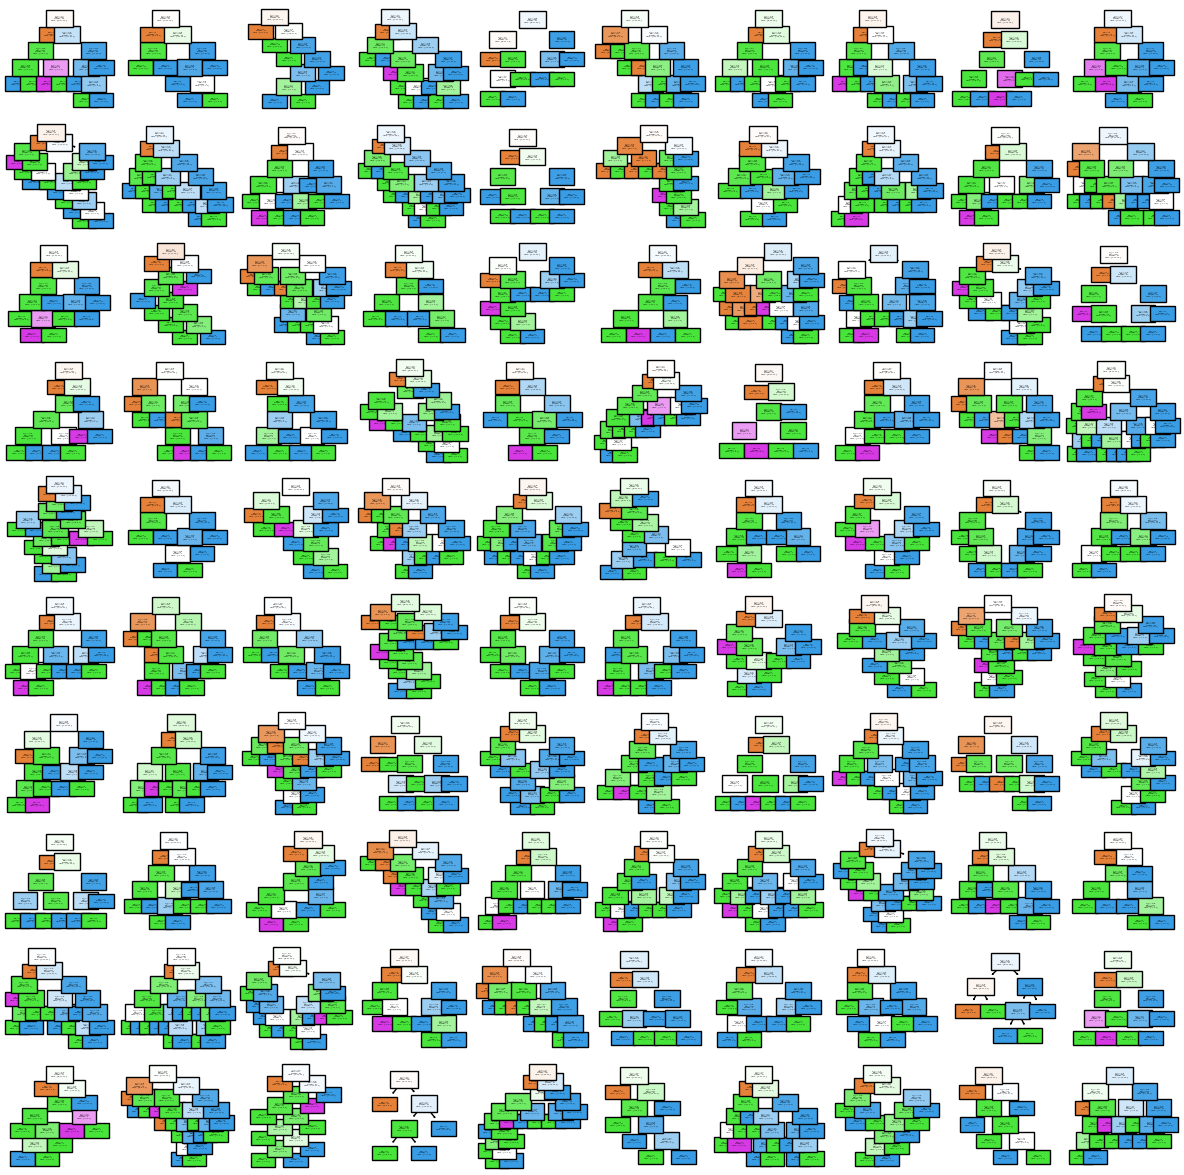

In [5]:
safeRFModel = SafeRandomForestClassifier(n_estimators=100)  # (criterion="entropy")

safeRFModel.fit(X, y)

print(f"Training set accuracy in this safe case is {safeRFModel.score(X,y)}")
fig, ax = plt.subplots(10, 10, figsize=(15, 15))
for row in range(10):
    for column in range(10):
        whichTree = 10 * row + column
        treeRowCol = safeRFModel.estimators_[whichTree]
        _ = plot_tree(treeRowCol, filled=True, ax=ax[row][column], fontsize=1)

## Using the save and reporting functionality¶

In [6]:
safeRFModel.save(name="testSaveRF.pkl")
safeRFModel.preliminary_check()
safeRFModel.request_release(path="testSaveRF", ext="pkl")

Preliminary checks: WARNING: model parameters may present a disclosure risk:
- parameter min_samples_leaf = 1 identified as less than the recommended min value of 5.


## The checkfile reports any warnings and recomendations in JSON format

In [7]:
target_json = os.path.normpath("testSaveRF/target.json")
with open(target_json) as f:
    print(f.read())

{
    "data_name": "",
    "n_samples": 0,
    "features": {},
    "n_features": 0,
    "n_samples_orig": 0,
    "generalisation_error": "unknown",
    "safemodel": [
        {
            "researcher": "j4-smith",
            "model_type": "RandomForestClassifier",
            "details": "WARNING: model parameters may present a disclosure risk:\n- parameter min_samples_leaf = 1 identified as less than the recommended min value of 5.",
            "k_anonymity": "1",
            "recommendation": "Do not allow release",
            "reason": "WARNING: model parameters may present a disclosure risk:\n- parameter min_samples_leaf = 1 identified as less than the recommended min value of 5.",
            "timestamp": "2023-10-12 01:51:15"
        }
    ],
    "model_path": "model.pkl",
    "model_name": "SafeRandomForestClassifier",
    "model_params": {
        "n_estimators": 100,
        "bootstrap": true,
        "oob_score": false,
        "n_jobs": null,
        "random_state": null,

## Putting it all together
-Don't forget to import the SafeModel classes.

In [8]:
from aisdc.safemodel.classifiers import SafeRandomForestClassifier

safeRFModel = SafeRandomForestClassifier(n_estimators=100)  # (criterion="entropy")
safeRFModel.fit(X, y)
safeRFModel.save(name="testSaveRF.pkl")
safeRFModel.preliminary_check()
safeRFModel.request_release(path="testSaveRF", ext="pkl")

Preliminary checks: WARNING: model parameters may present a disclosure risk:
- parameter min_samples_leaf = 1 identified as less than the recommended min value of 5.
Preliminary checks: WARNING: model parameters may present a disclosure risk:
- parameter min_samples_leaf = 1 identified as less than the recommended min value of 5.


## Examine the checkfile contents


In [9]:
target_json = os.path.normpath("testSaveRF/target.json")
with open(target_json) as f:
    print(f.read())

{
    "data_name": "",
    "n_samples": 0,
    "features": {},
    "n_features": 0,
    "n_samples_orig": 0,
    "generalisation_error": "unknown",
    "safemodel": [
        {
            "researcher": "j4-smith",
            "model_type": "RandomForestClassifier",
            "details": "WARNING: model parameters may present a disclosure risk:\n- parameter min_samples_leaf = 1 identified as less than the recommended min value of 5.",
            "k_anonymity": "1",
            "recommendation": "Do not allow release",
            "reason": "WARNING: model parameters may present a disclosure risk:\n- parameter min_samples_leaf = 1 identified as less than the recommended min value of 5.",
            "timestamp": "2023-10-12 01:51:35"
        }
    ],
    "model_path": "model.pkl",
    "model_name": "SafeRandomForestClassifier",
    "model_params": {
        "n_estimators": 100,
        "bootstrap": true,
        "oob_score": false,
        "n_jobs": null,
        "random_state": null,